<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Roberto Jefferson (PTB) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pelo candidato Roberto Jefferson do partido PTB, do qual pode ser visualizado clicando <a href="https://divulgacandcontas.tse.jus.br/candidaturas/oficial/2022/BR/BR/544/candidatos/916134/5_1660343714472.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = 'PlanosPDF/PLANOPTB.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'CreationDate': "D:20220812171751-02'00'",
 'Creator': 'Adobe Illustrator 26.4 (Windows)',
 'Title': 'Plano de Governo BOB 2',
 'Producer': 'iLovePDF',
 'ModDate': 'D:20220812223211Z'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

12

In [7]:
# Página 1
pdf.pages[0].extract_text()

''

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

NO ASPECTO POLÍTICO
O respeito à Constituição e a preservação da unidade nacional são princípios 
essenciais para o PTB, assim como o fortalecimento do regime federativo e a auto-
nomia político-administrativa dos estados e municípios;
O PTB entende que o cidadão tem o direito à legítima defesa, portanto deve ter 
direito à posse e porte de arma de fogo, conforme resultado de consulta popular 
realizada no país com essa ﬁnalidade especíﬁca e que nunca foi respeitada;
O PTB é um partido que defende o trabalhador. É o partido dos que trabalham e 
dos que trabalham para gerar empregos. O PTB não é um partido classista;
O PTB considera a democracia como valor fundamental e defende:
  Respeito aos direitos e garantias fundamentais;
  Respeito aos direitos das minorias;
  Voto direto, secreto, facultativo e universal, em todos os níveis;
  Pluripartidarismo, com cláusula de desempenho;
  Direito à livre informação e garantia da privacidade;
  Igualdade de oportunidades;
  Igualdade de todos 

## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

DIREI


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

direita, graças a deus
ser de direita' é, em primeiro lugar, ser um defensor da liberdade.
é crer que a liberdade é o caminho para o desenvolvimento do indivíduo, de sua 
família e de nações inteiras. além disso, é um direito primordial concedido por deus.
o ptb é um defensor aguerrido deste princípio, que está manifestado no nosso pró-
prio estatuto, registrado em cartório, em 2018.
nossos valores vêm de nossos princípios; a valorização de deus, da pátria, da vida, da 
família e da liberdade.
"ora, o senhor é o espírito e onde está o espírito do senhor ali há liberdade.” 
2 coríntios 3:17liberdade como princípio
o agigantamento do estado brasileiro se transformou em um ônus impagável para 
o contribuinte, que é principalmente o trabalhador. o contribuinte é a única fonte 
de recursos que o governo tem, pois não existe essa coisa de ‘dinheiro público’. 
esta situação inviabiliza o estabelecimento de uma economia competitiva, gerando 
o fechamento e migração de empresas e seus postos de

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

direita  graças a deus
ser de direita  é  em primeiro lugar  ser um defensor da liberdade 
é crer que a liberdade é o caminho para o desenvolvimento do indivíduo  de sua 
família e de nações inteiras  além disso  é um direito primordial concedido por deus 
o ptb é um defensor aguerrido deste princípio  que está manifestado no nosso pró 
prio estatuto  registrado em cartório  em 2018 
nossos valores vêm de nossos princípios  a valorização de deus  da pátria  da vida  da 
família e da liberdade 
 ora  o senhor é o espírito e onde está o espírito do senhor ali há liberdade  
2 coríntios 3 17liberdade como princípio
o agigantamento do estado brasileiro se transformou em um ônus impagável para 
o contribuinte  que é principalmente o trabalhador  o contribuinte é a única fonte 
de recursos que o governo tem  pois não existe essa coisa de  dinheiro público  
esta situação inviabiliza o estabelecimento de uma economia competitiva  gerando 
o fechamento e migração de empresas e seus postos de t

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['direita', 'graças', 'a', 'deus', 'ser']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['direita', 'graças', 'deus', 'direita', 'primeiro']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('ptb', 54),
 ('mundo', 17),
 ('estado', 15),
 ('brasil', 15),
 ('trabalho', 11),
 ('nacional', 11),
 ('brasileiro', 9),
 ('entende', 9),
 ('país', 9),
 ('partido', 9),
 ('política', 9),
 ('liberdade', 8),
 ('defende', 8),
 ('trabalhismo', 8),
 ('ainda', 8),
 ('época', 8),
 ('constituição', 7),
 ('todos', 7),
 ('união', 7),
 ('educação', 7),
 ('família', 6),
 ('princípios', 6),
 ('trabalhador', 6),
 ('economia', 6),
 ('cada', 6),
 ('direitos', 6),
 ('sociedade', 6),
 ('partidos', 6),
 ('parte', 6),
 ('ensino', 6)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,ptb,54
1,mundo,17
2,estado,15
3,brasil,15
4,trabalho,11


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

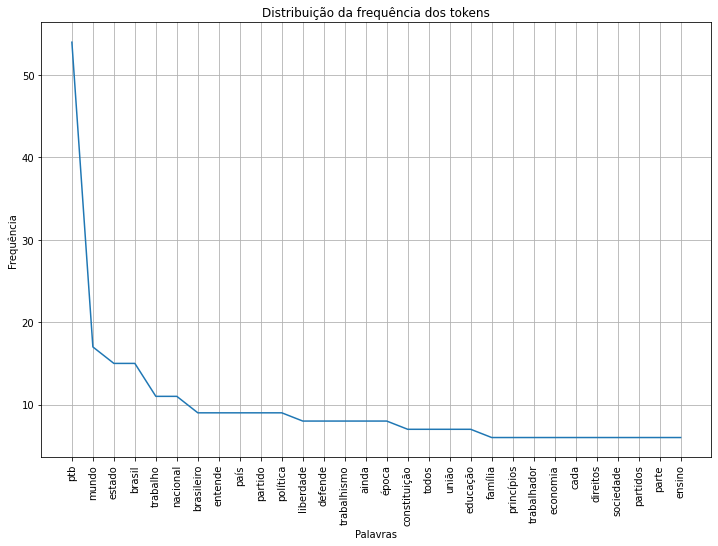

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

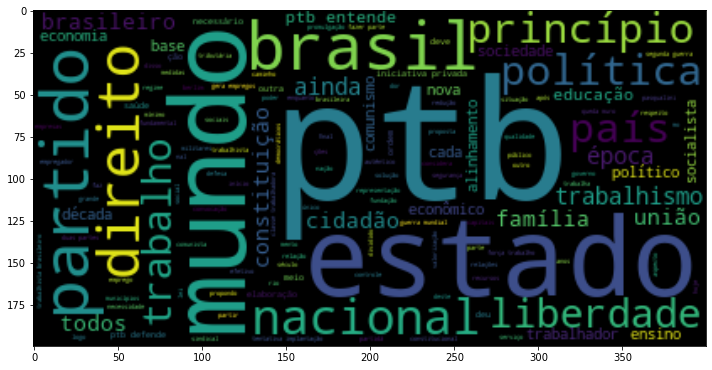

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022